The data includes the values of 5 points for a periodic function with a period of $T = 2\pi$.

Find a generalized polynomial of an adequate basis that approximates the given function.

Illustrate graphically.

|  x   |  y   |
| :--: | :--: |
| 0    | 0    |
| 0.95 | 10.3 |
| 1.75 | 0.5  |
| 4.75 | 0.9  |
| 5.9  | 1.2  |

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../util/')

from basis_poly import trig_poly, alg_poly
from lagrange_poly import lagrange_poly

In [3]:
nodes = np.array([0, 0.95, 1.75, 4.75, 5.9])
values = np.array([0, 10.3, 0.5, 0.9, 1.2])

The nodes are sparsely located.
This means that interpolating directly may not give the best results.

To construct a periodic function we will need to use a trigonometric polinomial.

Let's plot an algebraic polynomial and a trigonometric and see the differences.

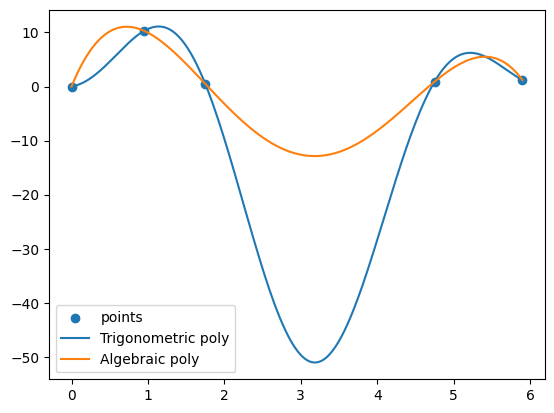

In [7]:
x_axis = np.linspace(nodes.min(), nodes.max(), 300)

plt.scatter(nodes, values)
plt.plot(x_axis, trig_poly(nodes, values, x_axis))
plt.plot(x_axis, alg_poly(nodes, values, x_axis))
plt.legend(['points', 'Trigonometric poly', 'Algebraic poly'])
plt.show()

The algebraic polynomial seems to interpolate the date much better.
So we will force the trigonometric polynomial to pass into some of the points, defined by the algebraic polynomial

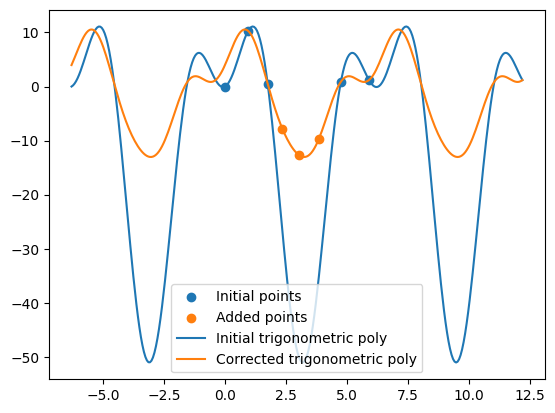

In [8]:
new_nodes = np.array([0.95, 1.75, 2.35, 3.05, 3.85, 4.75, 5.9])
new_values = np.array([10.3, 0.5, alg_poly(nodes, values, 2.35),
  alg_poly(nodes, values, 3.05), alg_poly(nodes, values, 3.85), 0.9, 1.2])

x_axis = np.linspace(nodes.min() - 2*np.pi, nodes.max() + 2*np.pi, 300)

plt.scatter(nodes, values)
plt.scatter([2.35, 3.05, 3.85], [alg_poly(nodes, values, 2.35),
  alg_poly(nodes, values, 3.05), alg_poly(nodes, values, 3.85)])
plt.plot(x_axis, trig_poly(nodes, values, x_axis))
plt.plot(x_axis, trig_poly(new_nodes, new_values, x_axis))
plt.legend(['Initial points', 'Added points',
  'Initial trigonometric poly', 'Corrected trigonometric poly'])
plt.show()